<a href="https://www.kaggle.com/code/zysciai/gan-img?scriptVersionId=103139937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install d2l
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from torch.utils import data 
from d2l import torch as d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 606.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: chardet
    Found existing installation: chardet 5.0.0
    Uninstalling chardet-5.0.0:
      Successfully uninstalled charde

In [2]:
#图片预处理
train_transform=transforms.Compose([
    transforms.ToTensor(),
                                transforms.Normalize(0.5,0.5,0.5)])
test_transform=transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize(0.5,0.5,0.5) ])

In [3]:

# total_imags=torchvision.datasets.CIFAR10(root="./CIFAR10_img",train=True,
#                                         download=True)
# d2l.show_images([total_imags[i][0] for i in range(16)],4,4,scale=1.5)

In [4]:
#读取图片
def read_data(augs,is_train,batch_size):
    dataset=torchvision.datasets.FashionMNIST(root='./DATAS',transform=augs,download=True,train=is_train)
    return data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)

In [5]:
#定义生成器
class Generate(nn.Module):
    def __init__(self):
        super().__init__()
        self.bp=nn.Sequential(
                            nn.Linear(100,256),nn.ReLU(True),
                            nn.BatchNorm1d(256),     
                            nn.Linear(256,512),nn.ReLU(True),nn.BatchNorm1d(512),
                            nn.Linear(512,28*28),nn.Tanh())
    def forward(self,x):
        Y=self.bp(x)
        Y=Y.view(-1,28,28)
        return Y
    
            

In [6]:
#定义判别器
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.bp = nn.Sequential(  
                                  nn.Linear(28*28, 512),
                                  nn.LeakyReLU(0.2,True),
                                  nn.Linear(512, 256),
                                  nn.LeakyReLU(0.2,True),
                                  nn.Linear(256, 1),
                                  nn.Sigmoid()
        )
    def forward(self, x):
        x=x.view(-1,28*28)
        Y = self.bp(x)
        return Y

In [7]:
#初始化模型
device="cuda" if torch.cuda.is_available() else "cpu"
gen = Generate().to(device)
dis = Discriminator().to(device)
#定义loss和优化器
lr,epochs=0.002,300
loss=nn.BCELoss()#二元交叉熵
g_optim=optim.Adam(gen.parameters(),lr=lr,betas=(0.5,0.999))
d_optim=optim.Adam(dis.parameters(),lr=lr,betas=(0.5,0.999))
#读取训练数据
train_data=read_data(train_transform,True,64)
test_input = torch.randn(16,100, device=device)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./DATAS/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./DATAS/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./DATAS/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./DATAS/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./DATAS/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./DATAS/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./DATAS/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./DATAS/FashionMNIST/raw



In [8]:
#展示图图
def gen_img_plot(model, test_input):
    prediction = np.squeeze(model(test_input).cpu().numpy())
    fig = plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(prediction[i])
        plt.axis('off')#关闭坐标
    plt.show()

GAN

epoch:1 g_loss:0.0026 d_loss:0.0014 timer:0.2299M


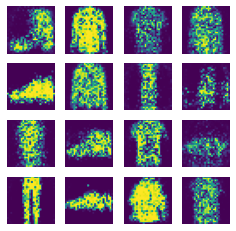

epoch:10 g_loss:0.0026 d_loss:0.0016 timer:2.2396M


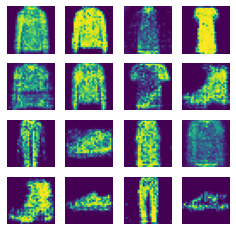

epoch:20 g_loss:0.0019 d_loss:0.0012 timer:4.4630M


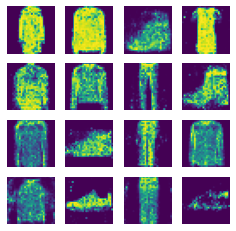

epoch:30 g_loss:0.0025 d_loss:0.0013 timer:6.7041M


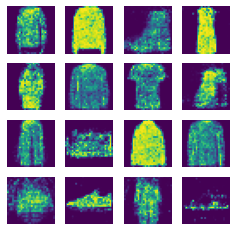

epoch:40 g_loss:0.0067 d_loss:0.0009 timer:8.9298M


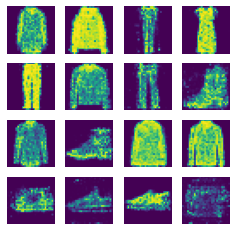

epoch:50 g_loss:0.0050 d_loss:0.0010 timer:11.1419M


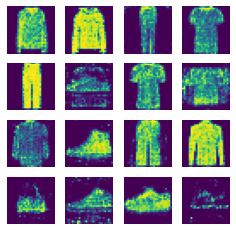

epoch:60 g_loss:0.0038 d_loss:0.0010 timer:13.3694M


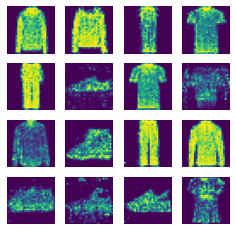

epoch:70 g_loss:0.0039 d_loss:0.0013 timer:15.5932M


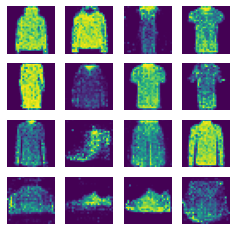

epoch:80 g_loss:0.0102 d_loss:0.0011 timer:17.8155M


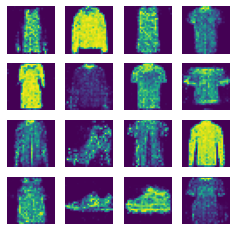

epoch:90 g_loss:0.0056 d_loss:0.0006 timer:20.0649M


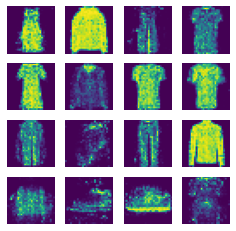

epoch:100 g_loss:0.0076 d_loss:0.0007 timer:22.3260M


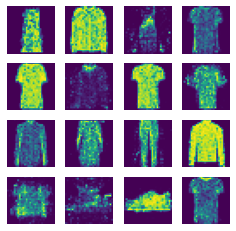

epoch:110 g_loss:0.0104 d_loss:0.0008 timer:24.5962M


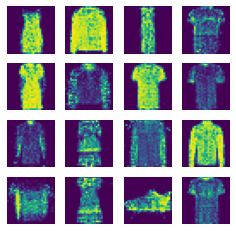

epoch:120 g_loss:0.0063 d_loss:0.0006 timer:26.9300M


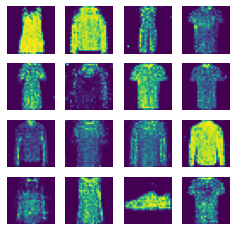

epoch:130 g_loss:0.0085 d_loss:0.0005 timer:29.3452M


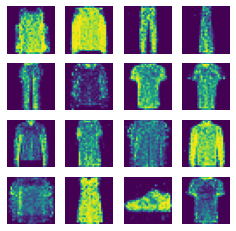

epoch:140 g_loss:0.0068 d_loss:0.0004 timer:31.8249M


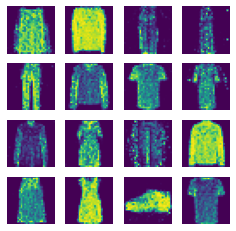

epoch:150 g_loss:0.0076 d_loss:0.0006 timer:34.3539M


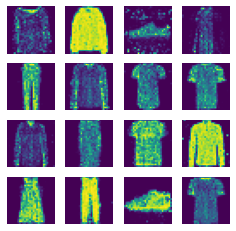

epoch:160 g_loss:0.0086 d_loss:0.0004 timer:36.8394M


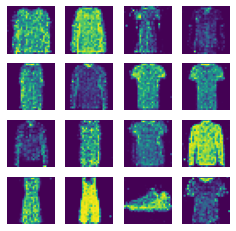

epoch:170 g_loss:0.0098 d_loss:0.0002 timer:39.3791M


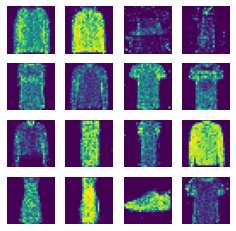

epoch:180 g_loss:0.0057 d_loss:0.0009 timer:41.9549M


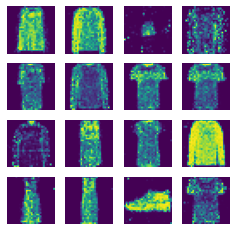

epoch:190 g_loss:0.0136 d_loss:0.0006 timer:44.5391M


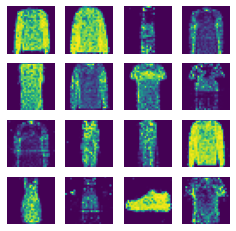

epoch:200 g_loss:0.0094 d_loss:0.0002 timer:47.1685M


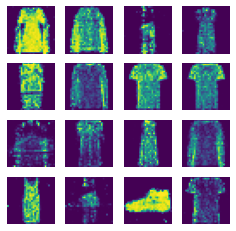

epoch:210 g_loss:0.0085 d_loss:0.0002 timer:49.8473M


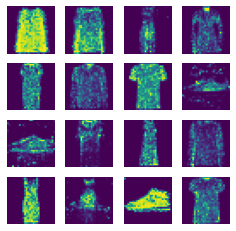

epoch:220 g_loss:0.0102 d_loss:0.0003 timer:52.6285M


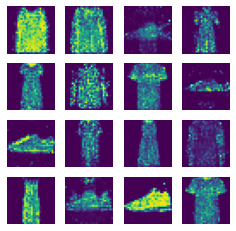

epoch:230 g_loss:0.0207 d_loss:0.0007 timer:55.4454M


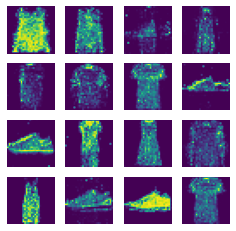

epoch:240 g_loss:0.0116 d_loss:0.0003 timer:58.2865M


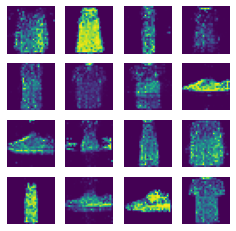

epoch:250 g_loss:0.0173 d_loss:0.0003 timer:61.1804M


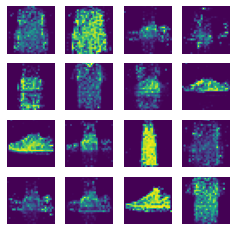

epoch:260 g_loss:0.0138 d_loss:0.0002 timer:64.1169M


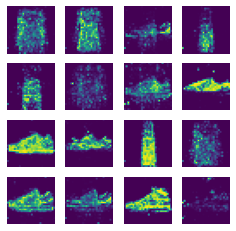

epoch:270 g_loss:0.0063 d_loss:0.0005 timer:67.1222M


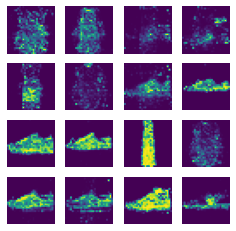

epoch:280 g_loss:0.0085 d_loss:0.0007 timer:70.1762M


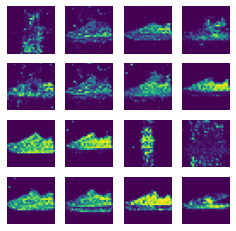

epoch:290 g_loss:0.0193 d_loss:0.0007 timer:73.3006M


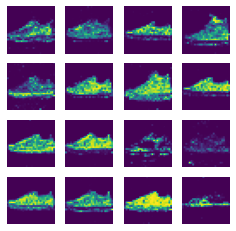

epoch:300 g_loss:0.0000 d_loss:0.1066 timer:76.4735M


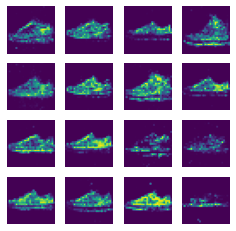

saving...


In [9]:
#GAN的训练
timer=d2l.Timer()
for epoch in range(epochs):
    count = len(train_data)
    for i, (img, _) in enumerate(train_data):
        img = img.to(device)
        #定义随机噪音
        noise=torch.randn(img.size(0),100,device=device)
         #训练鉴别器-真样本
        d_optim.zero_grad()
        timer.start()
        real_img=dis(img)
        d_loss_real=loss(real_img,
                         torch.ones_like(real_img))
        d_loss_real.backward()
        #训练鉴别器-假样本
        gen_img = gen(noise)
        fake_img=dis(gen_img.detach())
        d_loss_fake=loss(fake_img,
                         torch.zeros_like(fake_img))
        d_loss_fake.backward()
        d_loss=(d_loss_fake+d_loss_real)/2
        d_optim.step()
        #训练生成器
        g_optim.zero_grad()
        fake_img=dis(gen_img)
        g_loss=loss(fake_img,
                    torch.ones_like(fake_img))
        g_loss.backward()
        g_optim.step()
        with torch.no_grad():
            d_loss+=d_loss
            g_loss+=g_loss
        timer.stop()    
    with torch.no_grad():
        d_loss/=count
        g_loss/=count
        if (epoch+1)%10==0 or epoch==0 :
            print(f"epoch:{epoch+1}",f"g_loss:{g_loss.item():.4f}",f"d_loss:{d_loss.item():.4f}",f'timer:{timer.sum()/60:.4f}M')
            gen_img_plot(gen, test_input)
#保存模型
print("saving...")
torch.save(gen,"gen_model.pth")
torch.save(dis,"dis_model.pth")
            